# Classificação dos tipos de cogumelo

O objetivo desse projeto é conseguir classificar um cogumelo como comestível ou venenoso.

- Esther Dagir
- Gustavo Katz
- Lila Habda
- Rafael Oncins

### Importando bibliotecas e fazendo a leitura do Dataframe

In [1]:
# Bibliotecas que serão utilizadas no código
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

#leitura do Dataframe
df = pd.read_csv('mushrooms.csv')

In [2]:
# Dataframe dos cogumelos
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Nossa intenção é conseguir utilizar o dataframe acima para determinar a classe ("p"= venenoso; "e"= comestível) do cogumelo conforme suas outras características.

## Análise exploratória

A ideia nessa análise é avaliar a influência de cada categoria na determinação de um cogumelo como comestível ou venenoso. Para isso, vamos criar gráficos que analisam a frequência de determinada característica em cada tipo de cogumelo, conforme cada categoria (coluna).

<ipython-input-3-699ed0ba16ec>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


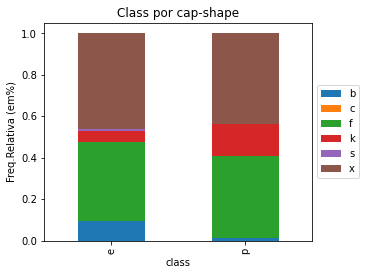

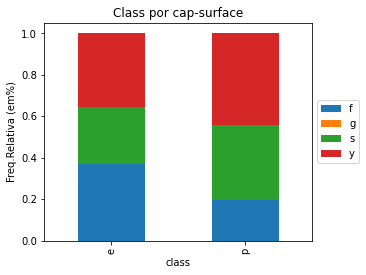

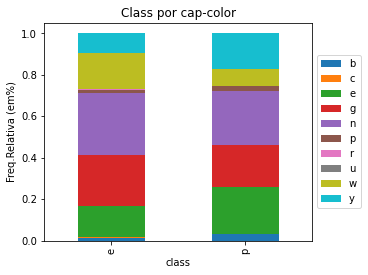

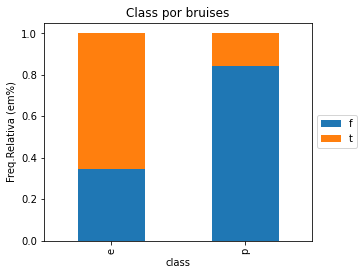

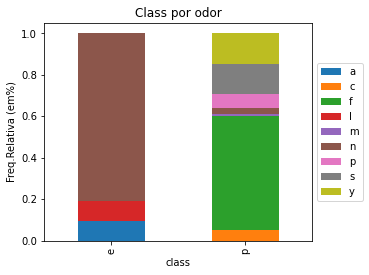

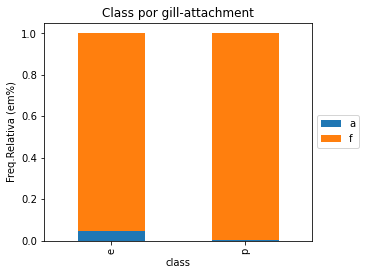

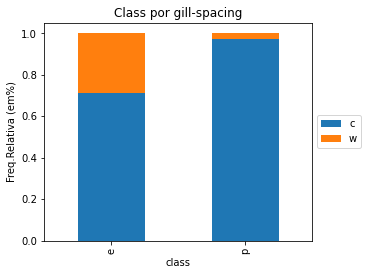

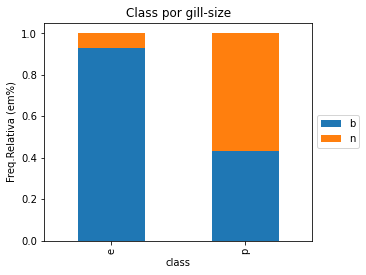

In [3]:
# Para construir um gráfico para cada coluna, vamos dividir em três células a fim de facilitar a visualização
# Gráficos que demonstram as características dos cogumelos conforme sua classificação
# Crosstab entre a classe (comestível ou venenoso) e as colunas do dataframe 

lista = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size']

for i in lista:
    cross = pd.crosstab(df["class"], df[i], normalize="index")
    plot = cross.plot(kind='bar', stacked=True,title=f'Class por {i}')
    plt.ylabel('Freq.Relativa (em%)')
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<ipython-input-4-726ab870eec7>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


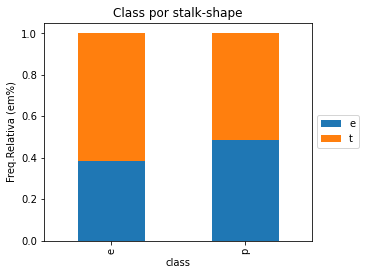

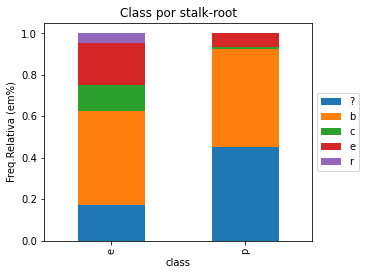

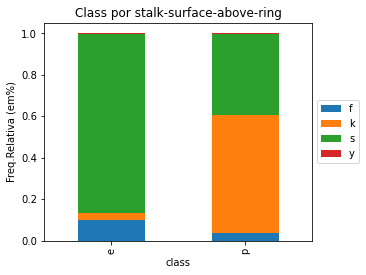

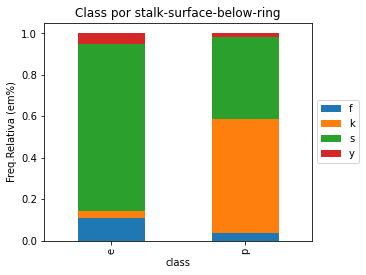

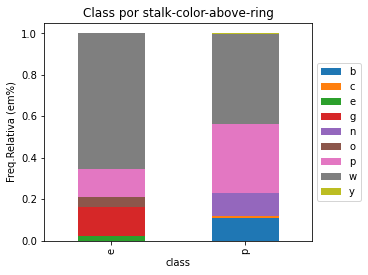

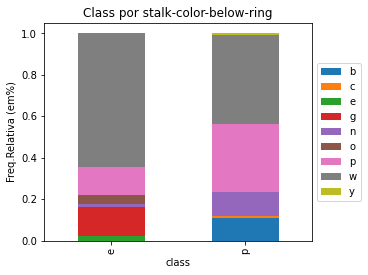

In [4]:
# Gráficos que demonstram as características dos cogumelos conforme sua classificação
# Crosstab entre a classe (comestível ou venenoso) e as colunas do dataframe 

lista = ['stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring']

for i in lista:
    cross = pd.crosstab(df["class"], df[i], normalize="index")
    plot = cross.plot(kind='bar', stacked=True,title=f'Class por {i}')
    plt.ylabel('Freq.Relativa (em%)')
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<ipython-input-5-46173eb4ab6c>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


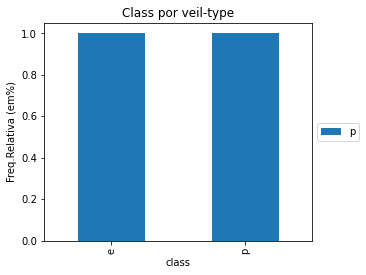

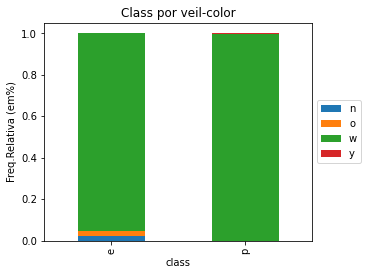

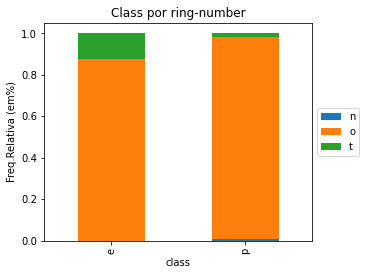

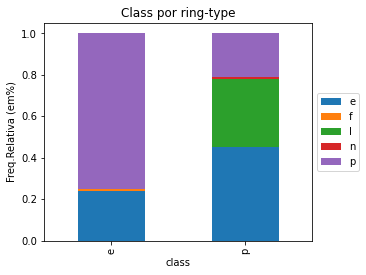

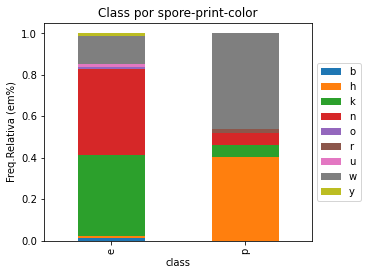

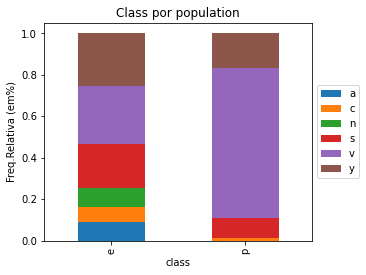

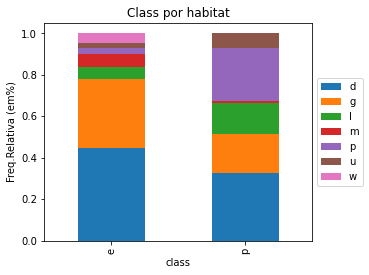

In [5]:
# Gráficos que demonstram as características dos cogumelos conforme sua classificação
# Crosstab entre a classe (comestível ou venenoso) e as colunas do dataframe 

lista = ['veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

for i in lista:
    cross = pd.crosstab(df["class"], df[i], normalize="index")
    plot = cross.plot(kind='bar', stacked=True,title=f'Class por {i}')
    plt.ylabel('Freq.Relativa (em%)')
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Análise inicial
A partir da análise dos gráficos, foi possível identificar as categorias que mais influenciam a determinação de um cogumelo como comestível ou venenoso. Dessa maneira, filtramos algumas categorias:

odor, stalk-color-above-ring, ring-type, spore-print-color, population, habitat

odor, stalk-color-above-ring, ring-type, spore-print-color, population, habitat

Justificativa pela escolha das categorias:
- Odor: Pode-se perceber que pelo gráfico odor X class, a primeira tem uma grande influência na segunda já que há uma grande distinção das características e o odor do tipo "n" parece ser um fator de relevância para a classe "comestível".


- Stalk-color-above-ring: Apesar de o tipo "p" e "w" apresentarem relevância nas duas classes, pode-se notar uma boa diferenciabilidade entre elas nos outros tipos, visto que essas, por sua peculiaridade, farão uma distinção de comestível e não comestível.


- Ring-type: Nesse gráfico, é possível observar principalmente a influência da característica "l" muito presente nos cogumelos venenosos.


- Spore-print-color: Nesse gráfico, embora ambas as classes tenham essas características, a classe "comestível" tem uma alta frenquência dos fatores "n" e "k", enquanto a classe do tipo "venenoso" tem uma alta frenquência dos fatores "w" e "h".


- Population: Assim como no item 2, os tipos "v", "s" e "y" apresentam grande presença nos tipos comestível e não comestível. No entanto, os demais tipos tem uma maior diferença, sendo esse em maioria no comestível, o que permite diferenciar tais classes.


- Habitat: No gráfico do habitat, aparentemente há uma semelhança entre os fatores para ambas classes, porém as quantidades são diferentes para cada classe, principalmente do tipo "p".

A partir desse ponto, nós vamos utilizar apenas essas colunas como referências para o nosso modelo. Portanto, criamos um novo dataframe:

In [6]:
# Separando somente as colunas que serão utilizadas na classificação
cl_utilizadas = df.loc[:,['odor','stalk-color-above-ring','ring-type','spore-print-color','population','habitat']]
cl_utilizadas

,odor,stalk-color-above-ring,ring-type,spore-print-color,population,habitat
0,p,w,p,k,s,u
1,a,w,p,n,n,g
2,l,w,p,n,n,m
3,p,w,p,k,s,u
4,n,w,e,n,a,g
...,...,...,...,...,...,...
8119,n,o,p,b,c,l
8120,n,o,p,b,v,l
8121,n,o,p,b,c,l
8122,y,w,e,w,v,l


Agora, para facilitar a leitura dos dados, vamos trocar as variáveis letras por números, de modo que novas colunas serâo criadas para cada variável. Assim, o valor 1 representará a presença de tal característica e o valor 0 representará a sua ausência.  

In [7]:
x = pd.get_dummies(cl_utilizadas)
x.head(5)

In [ ]:
# Nessa célula, estamos trocando as letras por números também no nosso target
# A partir de agora, 0 corresponde a comestível e 1 corresponde a venenoso
df['class'] = df['class'].replace('e', 0)
df['class'] = df['class'].replace('p', 1)
y = df['class']

### Árvore de decisão

A árvore de decisão é um método utilizado para facilitar a análise de possíveis resultados diferentes de um determinado assunto. Ou seja, a partir de uma árvore de decisão, é possível mapear os resultados conforme diferentes escolhas e diferentes probabilidades. Com ela, poderemos avaliar como se comporta o processo de classificação conforme as características mais influentes. Utilizamos o link a seguir para esclarecer o conceito:

https://www.lucidchart.com/pages/pt/o-que-e-arvore-de-decisao


Com isso, vamos criar uma árvore de decisão com as categorias selecionadas a fim de observar o seu comportamento. Ou seja, a nossa árvore vai nos ajudar a reconhecer quais são as características mais significativas para determinar se um cogumelo é ou não comestível.

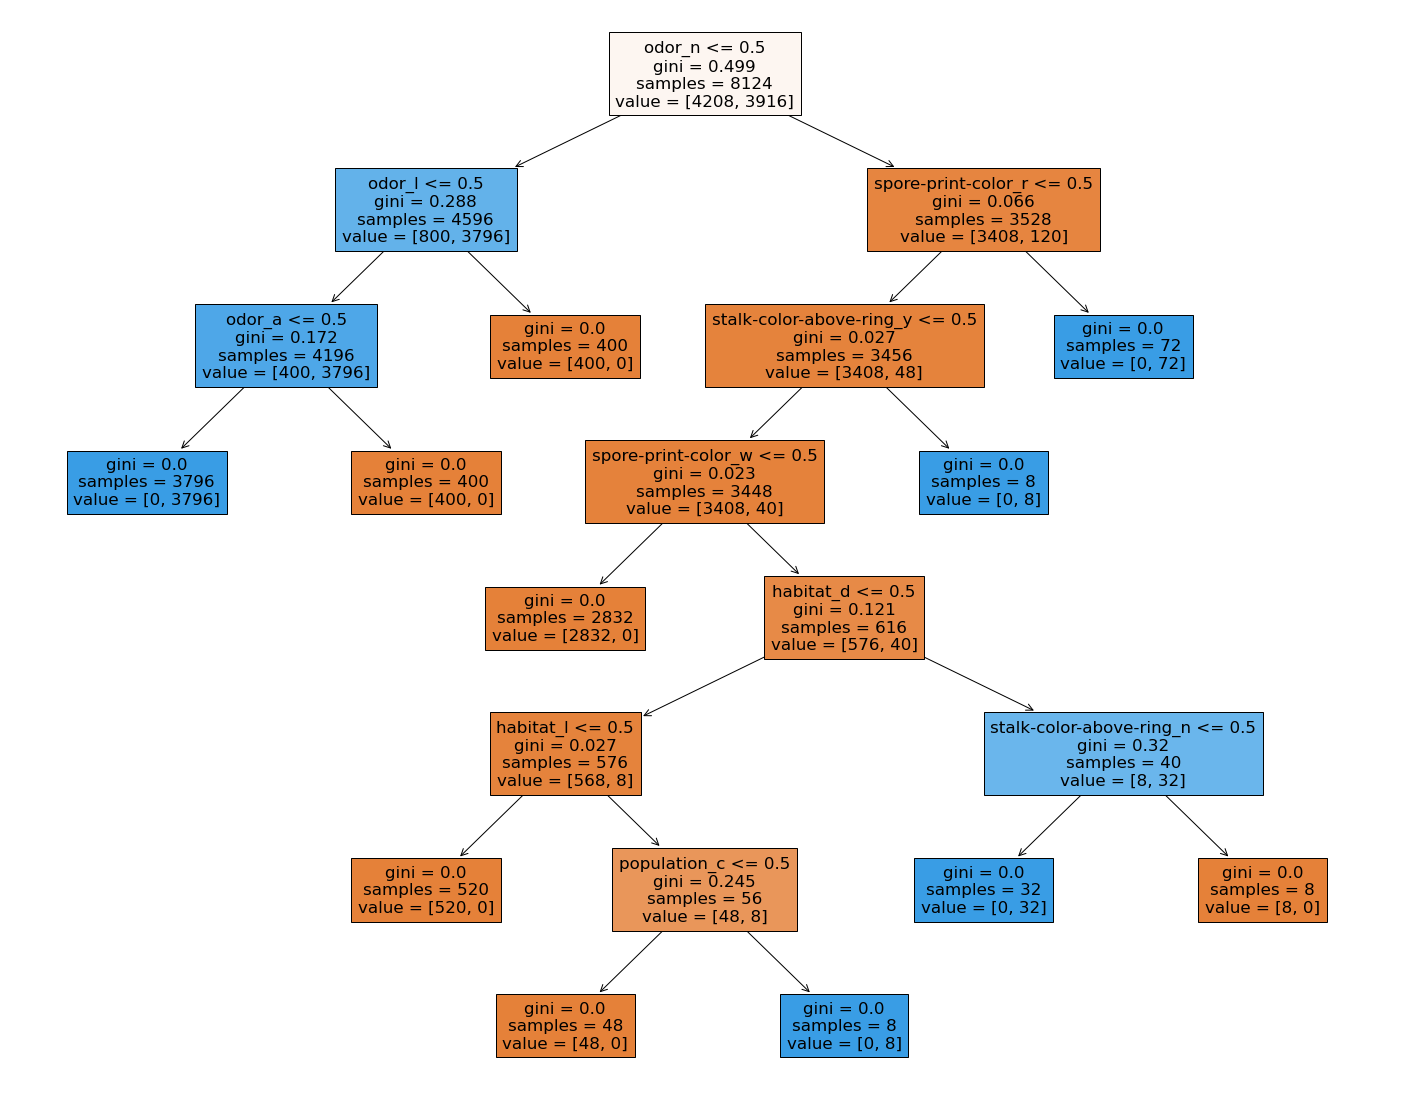

In [8]:
# árvore de decisão
# uma maneira de classificar um cogumelo como comestível ou venenoso, com base nas características selecionadas acima
clf = tree.DecisionTreeClassifier(random_state = 0)
clf = clf.fit(x, df['class'])

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=x.columns, filled=True)

A árvore de decisão facilitou a compreensão das principais características que influenciam na classificação dos cogumelos. No caso, podemos observar que o odor do tipo "n" parece ser um fator significante nesse processo de seleção. Além dele, o odor do tipo "l" e o spore-print-color do tipo "r" aparentam ser fatores significantes também.

## Implementando os modelos de predição

Agora que já fizemos a análise exploratória para entender melhor nosso Dataframe, vamos iniciar as implementação dos modelos de predição.

Para começar, vamos separar os dados em uma coluna de treinamento e uma de teste. Essas colunas serão usadas para ambos os modelos de predição. 
A planilha de testes corresponde a 20% dos dados, e os outros 80% serão utilizados para o treinamento. 

In [9]:
# Separando os dados em treinamento e teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

### Primeiro modelo

Nesse primeiro modelo, utilizamos o ExtraTreesClassifier da biblioteca sklearn para fazer nossa predição. Assim, o classificador irá utilizar a parte dos dados destinada ao treinamento para se ajustar e criar um modelo de predição conforme essas informações. Em seguida, com o comando "score()" o modelo consegue fazer uma predição com base no modelo criado. O resultado obtido corresponde a porcentagem de acerto do classificador.

In [ ]:
# Criando o modelo com base na planilha de treinamento
from sklearn.ensemble import ExtraTreesClassifier  # importando biblioteca utilizada 

modelo1 = ExtraTreesClassifier(n_estimators = 100) 
M1 = modelo1.fit(x_treino, y_treino) # modelo ajustado

In [10]:
# análise do resutado da aplicação do classificador na própria planilha de treinamento
resultado_treino = M1.score(x_treino, y_treino) 

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_treino}')

Acurácia do treino:1.0
Acurácia do teste: 1.0


Como foi possível notar na célula acima, o modelo utilizado funciona muito bem na planilha de treinamento, apresentando 100% de acertos na predição. Assim, o modelo está pronto para conseguir avaliar a planilha de testes podendo chegar a resultados mais precisos.

In [ ]:
# resultado obtido com a planilha teste
resultado_teste = M1.score(x_teste, y_teste) 

print(f'Resultado do modelo de predição aplicado a planilha de testes: {resultado_teste}')

Como foi possível observar, o nosso modelo utilizado obteve 100% de acertos mesmo na planilha de teste. Ou seja, o modelo tem um comportamento perfeito de modo que consiga analisar e classificar corretamente diferentes tipos de cogumelo.

### Segundo modelo

No segundo modelo, utilizamos a mesma biblioteca sklearn, e os mesmos dados de treinamento e teste, a fim de ser uma melhor maneira de comparar os resultados no final. Nesse caso, utilizamos a técnica da regressão logística para gerar um classificador.

In [11]:
# Criando o modelo com base na planilha de treinamento
from sklearn.linear_model import LogisticRegression # importando biblioteca utilizada 

modelo2= LogisticRegression(fit_intercept = False)
M2 = modelo2.fit(x_treino, y_treino) # modelo ajustado

Acurácia do treino:0.9990767810432374
Acurácia do teste: 0.9987692307692307


In [12]:
# resutado da aplicação do classificador na própria planilha de treinamento
resultado_treino2 = M2.score(x_treino, y_treino) 

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_treino2}')

,coeficientes,treinamento
5,-5.596971,odor_n
0,-3.604697,odor_a
3,-3.573930,odor_l
44,-3.497862,habitat_w
29,-2.325458,spore-print-color_u
26,-2.271676,spore-print-color_n
25,-2.093278,spore-print-color_k
19,-1.614933,ring-type_f
34,-1.423160,population_n
11,-0.752549,stalk-color-above-ring_e


Na célula acima, foi obtido a precisão do modelo quando utilizado na planilha de treinamento. Assim, é possível notar que houva uma taxa muito alta de precisão, atingindo mais de 99%. Assim, o classificador está bom o suficiente para conseguir ser implementado na planilha de teste.

In [ ]:
# resultado obtido com a planilha teste
resultado_teste2 = M2.score(x_teste, y_teste) 

print(f'Acurácia do teste: {resultado_teste2}')

A partir do resultado obtido acima, pode-se perceber que o classificador teve um ótimo desempenho nos testes, obtendo mais uma vez uma taxa de precisão maior que 99%. Desse modo, o segundo modelo que utilizamos também tem uma ótima performance para classificar os cogumelos como sendo ou não comestíveis.

In [13]:
# análise dos coeficientes obtidos para cada coluna no modelo da regressão logística

coeficientes = pd.DataFrame(data={'coeficientes':abs(M2.coef_[0]),'treinamento':x_treino.columns})
coeficientes.sort_values('coeficientes').tail(10)

- Verificar e validar modelos
- Relatório (explicação do passo a passo, descrever tudo, conclusão)